In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('stopwords') # Download stop words list
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  # This package stems words.  Example: Turns loved into love (Minimizes Dimensionality)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14803\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
reviews = pd.read_csv('../../data/Restaurant_Reviews.tsv', delimiter='\t')
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [113]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


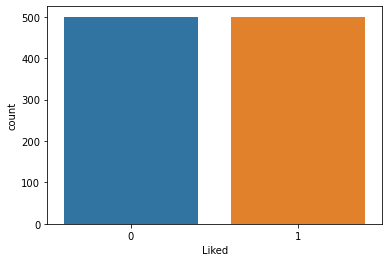

In [114]:
sns.countplot(reviews['Liked'])
plt.show()

### Text Cleaning

In [115]:
corpus = []
for i in range(0, len(reviews)):
    review = re.sub('[^a-zA-Z]',' ',reviews['Review'][i])   # Replace all non alphabetic characters with a space (a-z and A-Z) ^ symbol = NOT
    review = review.lower()                                 # Lower Case Everything
    review = review.split()                                 # Split into individual words
    ps = PorterStemmer()                                    # Iterates through each word and stems
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')          # Exclude the word 'not' from the stopwords since it thinks this is not significant
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]           
    review = ' '.join(review)                               # Joins back into a single message
    corpus.append(review)

In [116]:
# Examine the structure created
for i in range(0,11):
    print(corpus[i])

wow love place
crust not good
not tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price
get angri want damn pho
honeslti tast fresh
potato like rubber could tell made ahead time kept warmer
fri great
great touch
servic prompt


### Create the Bag of Words Model

In [120]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = reviews['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf_gmb = GaussianNB().fit(X_train, y_train)
y_pred = clf_gmb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[48 48]
 [18 86]]
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        96
           1       0.64      0.83      0.72       104

    accuracy                           0.67       200
   macro avg       0.68      0.66      0.66       200
weighted avg       0.68      0.67      0.66       200



In [118]:
print(classification_report)

<function classification_report at 0x0000018C214D7160>
